In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau , ModelCheckpoint
from keras.applications.mobilenet import MobileNet ,preprocess_input

# Enable eager execution
tf.config.run_functions_eagerly(True)

In [29]:
!python --version

Python 3.11.4


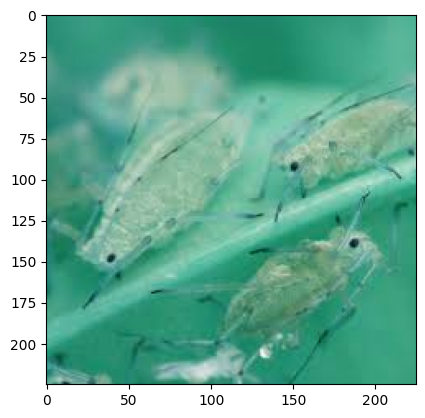

In [30]:
img=cv2.imread('../Dataset/pest/train/aphids/jpg_0 - Copy (2).jpg')
plt.imshow(img)
plt.show()


In [31]:
img=np.array(img)
img.shape

(225, 225, 3)

In [32]:
train_dir='../Dataset/pest/train/'
test_dir='../Dataset/pest/test/'



training=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.2,#0.1
    shear_range=20,#0.1
    zoom_range=0.8,#0.1
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.2,#0.1
    shear_range=20,#0.1
    zoom_range=0.8,#0.1
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset='validation',shuffle=True)

testing=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
).flow_from_directory(test_dir,batch_size=16,target_size=(224,224),shuffle=True)


Found 2565 images belonging to 9 classes.
Found 135 images belonging to 9 classes.
Found 135 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [33]:
mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [34]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99, epsilon=1e-8)

In [35]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001,mode='max')
callback=[EarlyStop , Reduce_LR]


In [36]:
mobilenet.trainable=False

In [37]:

model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,600,841 (21.37 MB)

 Trainable params: 2,367,369 (9.03 MB)

 Non-trainable params: 3,233,472 (12.33 MB)

In [39]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [40]:
history = model.fit(training, validation_data=validing, epochs=40, callbacks=callback, verbose=2)

c:\Users\Srinjoy\OneDrive\Desktop\Capital_One_Launchpad\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


c:\Users\Srinjoy\OneDrive\Desktop\Capital_One_Launchpad\myenv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


161/161 - 156s - 972ms/step - accuracy: 0.4511 - loss: 1.6766 - val_accuracy: 0.5556 - val_loss: 1.3618 - learning_rate: 1.0000e-03
Epoch 2/40
Epoch 2/40
161/161 - 149s - 924ms/step - accuracy: 0.5778 - loss: 1.2456 - val_accuracy: 0.5852 - val_loss: 1.1688 - learning_rate: 1.0000e-03
Epoch 3/40
161/161 - 149s - 924ms/step - accuracy: 0.5778 - loss: 1.2456 - val_accuracy: 0.5852 - val_loss: 1.1688 - learning_rate: 1.0000e-03
Epoch 3/40
161/161 - 172s - 1s/step - accuracy: 0.6296 - loss: 1.0944 - val_accuracy: 0.5778 - val_loss: 1.4423 - learning_rate: 1.0000e-03
Epoch 4/40
161/161 - 172s - 1s/step - accuracy: 0.6296 - loss: 1.0944 - val_accuracy: 0.5778 - val_loss: 1.4423 - learning_rate: 1.0000e-03
Epoch 4/40
161/161 - 369s - 2s/step - accuracy: 0.6565 - loss: 1.0320 - val_accuracy: 0.6000 - val_loss: 1.5642 - learning_rate: 1.0000e-03
Epoch 5/40
161/161 - 369s - 2s/step - accuracy: 0.6565 - loss: 1.0320 - val_accuracy: 0.6000 - val_loss: 1.5642 - learning_rate: 1.0000e-03
Epoch 5/40


In [41]:
loss , acc = model.evaluate(testing)

29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 713ms/step - accuracy: 0.9444 - loss: 0.2182
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 713ms/step - accuracy: 0.9444 - loss: 0.2182


In [42]:
print(loss)
print(acc*100)

0.21820798516273499
94.44444179534912


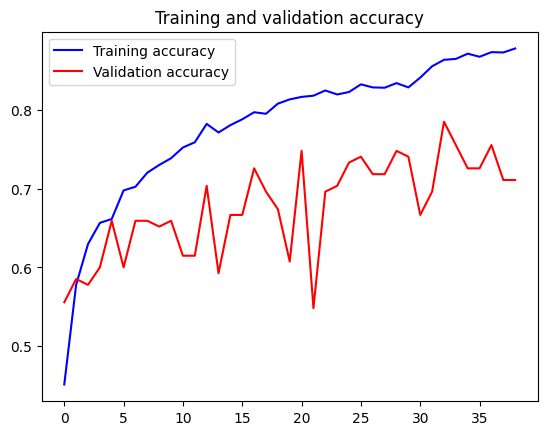

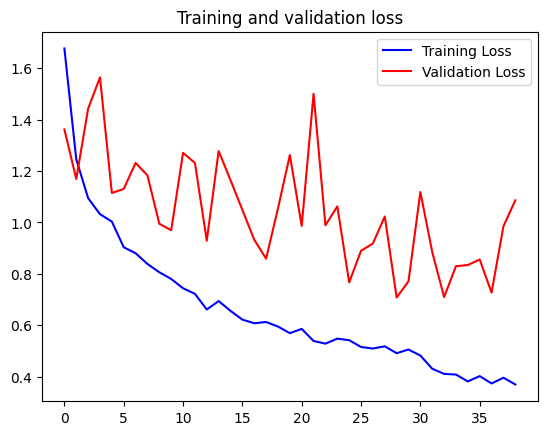

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
working_dir=r'../models/Pest_prediction/'


In [45]:
subject='pests' 
save_id=f'{subject}.h5'
model_save_loc=os.path.join(working_dir, save_id)
model.save(model_save_loc)
# msg= f'model was saved as {model_save_loc}'
# print_in_color(msg, (0,255,255), (100,100,100)) # cyan foreground

In [46]:
class_names = list(training.class_indices.keys())

In [47]:
class_names

['aphids',
 'armyworm',
 'beetle',
 'bollworm',
 'grasshopper',
 'mites',
 'mosquito',
 'sawfly',
 'stem_borer']

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

model = tf.keras.models.load_model(model_save_loc)  

img_path = "../Dataset/pest/train/stem_borer/jpg_1.jpg"

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0

pred = model.predict(img_array)
predicted_index = np.argmax(pred, axis=1)[0]
predicted_label = class_names[predicted_index]

print("Predicted:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted: stem_borer
Predicted: stem_borer
